In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
os.chdir("/content/gdrive/MyDrive/ColabNotebooks/LicensePlateDetection")

In [1]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import time
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

for dirname, _, filenames in os.walk('LicensePlateDetection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_json("Indian_Number_plates.json", lines=True)
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [6]:
os.mkdir("IndianNumberPlates")

FileExistsError: ignored

In [4]:
df = pd.read_csv("indian_license_plates.csv")
df["image_name"] = df["image_name"] + ".jpeg"
df.drop(["image_width", "image_height"], axis=1, inplace=True)
df.head()

,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014


In [5]:
os.chdir("/content/gdrive/MyDrive/ColabNotebooks/LicensePlateDetection/IndianNumberPlates")

In [6]:
df_1 = df["image_name"]

In [121]:
gray

array([[197, 198, 199, ..., 194, 194, 194],
       [197, 198, 199, ..., 194, 194, 194],
       [197, 198, 199, ..., 194, 194, 194],
       ...,
       [116, 127, 129, ..., 131, 127, 126],
       [130, 126, 137, ...,  97,  98, 103],
       [148, 145, 156, ..., 104, 106, 111]], dtype=uint8)

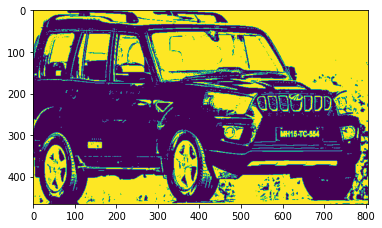

In [131]:
carplate_img = cv2.imread(df["image_name"][0],1)
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(carplate_img_rgb, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()

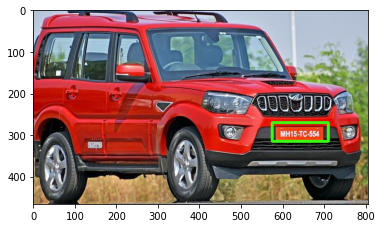

In [133]:
carplate_rects = carplate_haar_cascade.detectMultiScale(thresh1,scaleFactor=1.5, minNeighbors=7)
for x,y,w,h in carplate_rects:
  cv2.rectangle(carplate_img_rgb, (x,y), (x+w,y+h), (57,255,20), 5) 

plt.imshow(carplate_img_rgb)
plt.show()

In [9]:
carplate_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + './haarcascade_russian_plate_number.xml')

In [192]:
def carplate_detect(image):
  carplate_overlay = image.copy() 
  #plt.imshow(carplate_overlay)
  carplate_overlay_resized = cv2.resize(carplate_overlay, (1200, 800))
  carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay_resized,scaleFactor=1.1, minNeighbors=7)
  for x,y,w,h in carplate_rects:
    cv2.rectangle(carplate_overlay_resized, (x,y), (x+w,y+h), (57,255,20), 5) 
        
  return carplate_overlay_resized

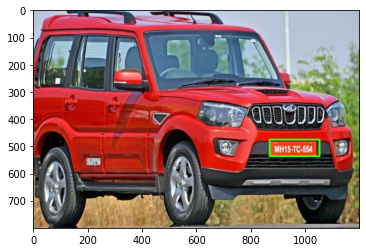

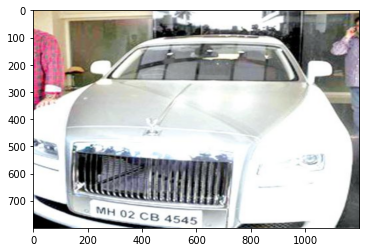

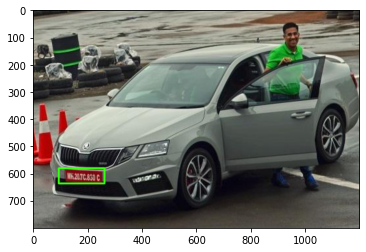

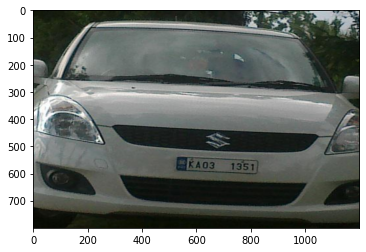

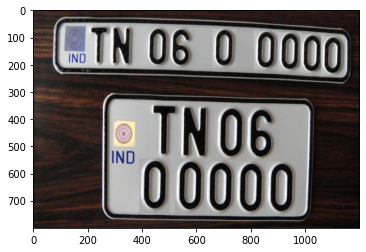

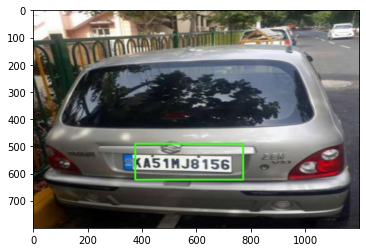

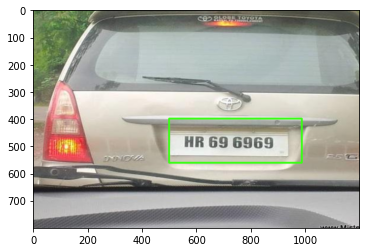

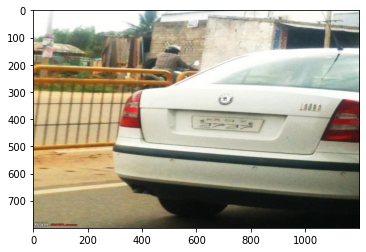

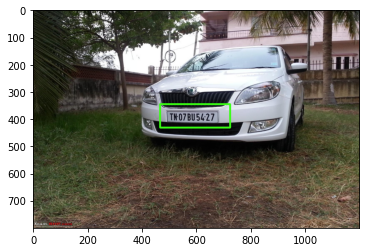

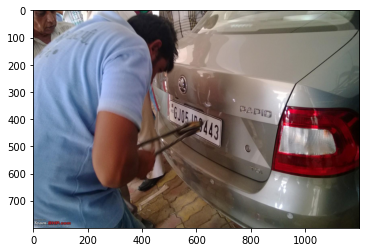

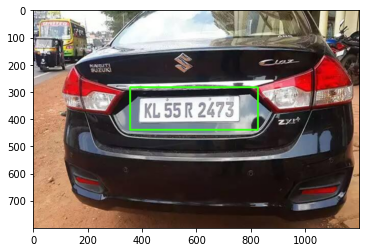

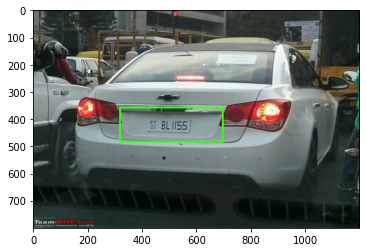

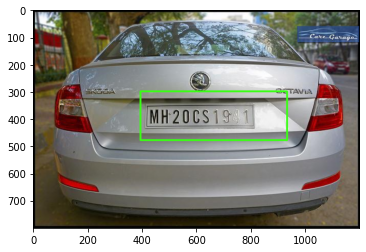

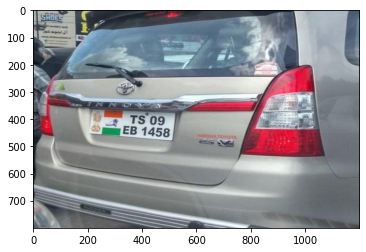

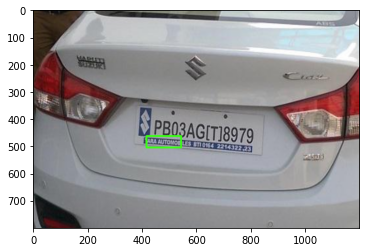

In [198]:
for image_index in range(0,15):
  
  carplate_img = cv2.imread(df["image_name"][image_index])
  carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)
  
  detected_carplate_img = carplate_detect(carplate_img_rgb)
  plt.imshow(detected_carplate_img)
  plt.show()
